In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

In [12]:
iris = load_iris()
print(iris.keys())

x_org, y_org = iris.data, iris.target

print(x_org.shape, y_org.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4) (150,)


In [26]:
x_data = iris.data[:100, :2]
y_data = iris.target[:100]

# print(x_data)
# print(y_data)
print(iris.feature_names[:2])
print(x_data.shape, y_data.shape)

['sepal length (cm)', 'sepal width (cm)']
(100, 2) (100,)


In [28]:
print(x_data.shape, y_data.shape)

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, random_state=123
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


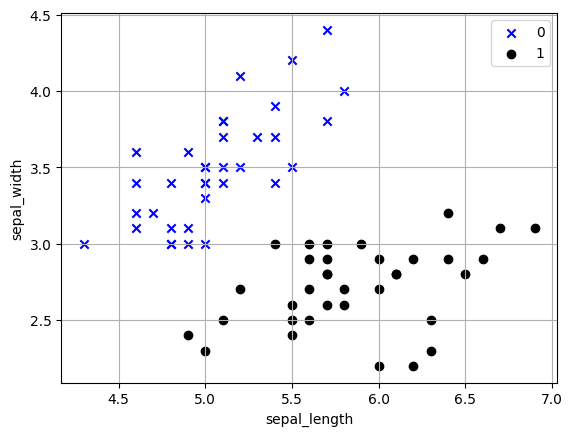

In [29]:
x_t0 = x_train[y_train==0]
x_t1 = x_train[y_train==1]

plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.grid()
plt.show()

In [31]:
n_input = x_train.shape[1]

n_output = 1

In [32]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        return x2

In [33]:
net = Net(n_input, n_output)

In [40]:
for parameter in net.named_parameters():
    print(parameter[0])
    print(parameter[1].data)
    print('='*50)

l1.weight
tensor([[1., 1.]])
l1.bias
tensor([1.])


In [47]:
print(net)
print(net.l1)
print(net.sigmoid)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Linear(in_features=2, out_features=1, bias=True)
Sigmoid()


In [48]:
summary(net, (2,), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [56]:
for parameter in net.parameters():
    print(parameter)
print('='*50)
for parameter in net.named_parameters():
    print(parameter)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)
('l1.weight', Parameter containing:
tensor([[1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1.], requires_grad=True))


In [57]:
loss = nn.BCELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [62]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

labels1 = labels.view((-1, 1))
print(labels1.shape)

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

labels1_test = labels_test.view((-1, 1))
print(labels1_test.shape)

torch.Size([70, 1])
torch.Size([30, 1])


In [63]:
outputs = net(inputs)

cost = loss(outputs, labels1)

In [77]:
lr = 0.001
net = Net(n_input, n_output)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 5))

In [78]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1)
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    predicted = torch.where(outputs < 0.5, 0, 1)
    train_acc = (predicted == labels1).sum() / len(y_train)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels1_test)
    
    val_loss = loss_test.item()
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)

    if (epoch % 10 == 0):
        print(f"Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}")
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/50000], loss: 4.77289, acc: 0.50000, val_loss: 4.57756, val_acc: 0.50000
Epoch [10/50000], loss: 4.67612, acc: 0.50000, val_loss: 4.48450, val_acc: 0.50000
Epoch [20/50000], loss: 4.57936, acc: 0.50000, val_loss: 4.39161, val_acc: 0.50000
Epoch [30/50000], loss: 4.48251, acc: 0.50000, val_loss: 4.29874, val_acc: 0.50000
Epoch [40/50000], loss: 4.38572, acc: 0.50000, val_loss: 4.20587, val_acc: 0.50000
Epoch [50/50000], loss: 4.28902, acc: 0.50000, val_loss: 4.11299, val_acc: 0.50000
Epoch [60/50000], loss: 4.19226, acc: 0.50000, val_loss: 4.02006, val_acc: 0.50000
Epoch [70/50000], loss: 4.09551, acc: 0.50000, val_loss: 3.92724, val_acc: 0.50000
Epoch [80/50000], loss: 3.99882, acc: 0.50000, val_loss: 3.83443, val_acc: 0.50000
Epoch [90/50000], loss: 3.90214, acc: 0.50000, val_loss: 3.74163, val_acc: 0.50000
Epoch [100/50000], loss: 3.80549, acc: 0.50000, val_loss: 3.64885, val_acc: 0.50000
Epoch [110/50000], loss: 3.70890, acc: 0.50000, val_loss: 3.55615, val_acc: 0.50000
Epo

In [79]:
print(f"초기상태")
print(f"손실: {history[0,3]:.5f} 정확도: {history[0, 4]:.5f}")
print(f"최종상태")
print(f"손실: {history[-1,3]:.5f} 정확도: {history[-1, 4]:.5f}")

초기상태
손실: 4.57756 정확도: 0.50000
최종상태
손실: 0.19323 정확도: 0.96667


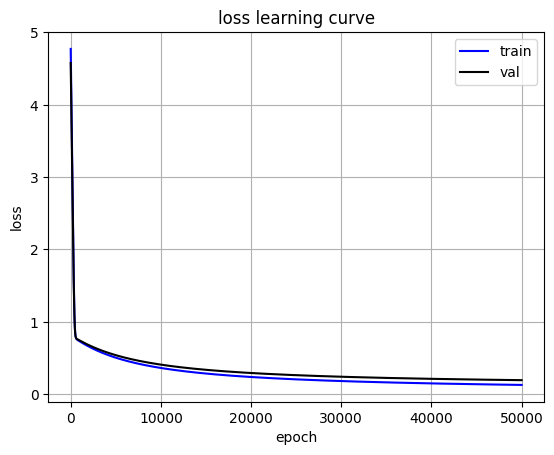

In [80]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss learning curve')
plt.legend()
plt.grid()
plt.show()

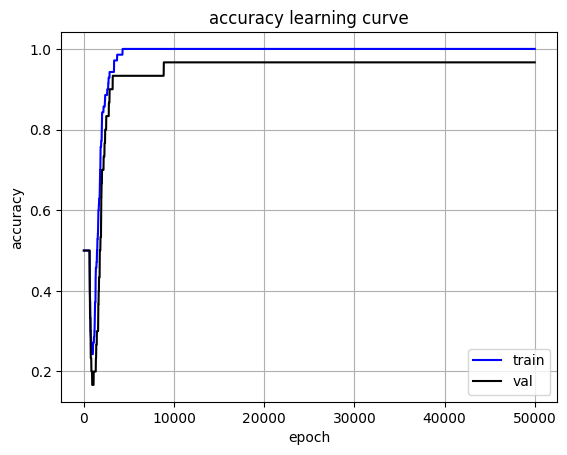

In [81]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy learning curve')
plt.legend()
plt.grid()
plt.show()

In [82]:
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

In [83]:
bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f"bias:{bias}, weight:{weight}")

def decision(x):
    return (-(bias + weight[0,0]*x)/weight[0,1])

x1 = np.array([x_test[:, 0].min(), x_test[:, 0].max()])
y1 = decision(x1)

print()
print(x1)
print()
print(y1)

bias:[0.4628677], weight:[[ 2.1976426 -3.9904997]]

[4.4 7. ]

[2.53915441 3.97102286]


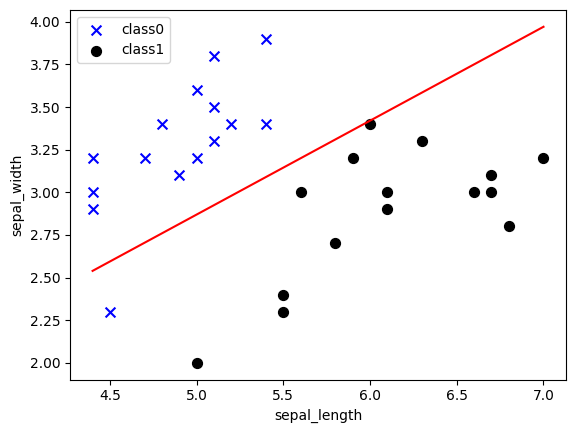

In [84]:
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='b', s=50, label='class0')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='k', s=50, label='class1')
plt.plot(x1, y1, c='r')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()